# Run model module locally

In [1]:
arguments = {}
# File arguments.
arguments["train_file_pattern"] = "gs://machine-learning-1234-bucket/gan/data/mnist/train*.tfrecord"
arguments["eval_file_pattern"] = "gs://machine-learning-1234-bucket/gan/data/mnist/test*.tfrecord"
arguments["output_dir"] = "gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model"

# Training parameters.
arguments["tf_version"] = 2.2
arguments["use_graph_mode"] = True
arguments["distribution_strategy"] = ""
arguments["write_summaries"] = False
arguments["num_epochs"] = 30
arguments["train_dataset_length"] = 60000
arguments["train_batch_size"] = 32
arguments["log_step_count_steps"] = 100
arguments["save_summary_steps"] = 100
arguments["save_checkpoints_steps"] = 10000
arguments["keep_checkpoint_max"] = 10
arguments["input_fn_autotune"] = False

# Eval parameters.
arguments["eval_batch_size"] = 32
arguments["eval_steps"] = 100

# Image parameters.
arguments["height"] = 28
arguments["width"] = 28
arguments["depth"] = 1

# Generator parameters.
arguments["latent_size"] = 512
arguments["generator_hidden_units"] = [256, 512, 1024]
arguments["generator_leaky_relu_alpha"] = 0.2
arguments["generator_final_activation"] = "tanh"
arguments["generator_l1_regularization_scale"] = 0.
arguments["generator_l2_regularization_scale"] = 0.
arguments["generator_optimizer"] = "Adam"
arguments["generator_learning_rate"] = 0.0002
arguments["generator_adam_beta1"] = 0.5
arguments["generator_adam_beta2"] = 0.999
arguments["generator_adam_epsilon"] = 1e-8
arguments["generator_clip_gradients"] = None
arguments["generator_train_steps"] = 1

# Discriminator hyperparameters.
arguments["discriminator_hidden_units"] = [1024, 512, 256]
arguments["discriminator_leaky_relu_alpha"] = 0.2
arguments["discriminator_l1_regularization_scale"] = 0.
arguments["discriminator_l2_regularization_scale"] = 0.
arguments["discriminator_optimizer"] = "Adam"
arguments["discriminator_learning_rate"] = 0.0002
arguments["discriminator_adam_beta1"] = 0.5
arguments["discriminator_adam_beta2"] = 0.999
arguments["discriminator_adam_epsilon"] = 1e-8
arguments["discriminator_clip_gradients"] = None
arguments["discriminator_train_steps"] = 1
arguments["label_smoothing"] = 0.9


In [2]:
import os

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = arguments["train_file_pattern"]
os.environ["EVAL_FILE_PATTERN"] = arguments["eval_file_pattern"]
os.environ["OUTPUT_DIR"] = arguments["output_dir"]

# Import os environment variables for train hyperparameters.
os.environ["TF_VERSION"] = str(arguments["tf_version"])
os.environ["USE_GRAPH_MODE"] = str(arguments["use_graph_mode"])
os.environ["DISTRIBUTION_STRATEGY"] = arguments["distribution_strategy"]
os.environ["WRITE_SUMMARIES"] = str(arguments["write_summaries"])
os.environ["NUM_EPOCHS"] = str(arguments["num_epochs"])
os.environ["TRAIN_DATASET_LENGTH"] = str(arguments["train_dataset_length"])
os.environ["TRAIN_BATCH_SIZE"] = str(arguments["train_batch_size"])
os.environ["LOG_STEP_COUNT_STEPS"] = str(arguments["log_step_count_steps"])
os.environ["SAVE_SUMMARY_STEPS"] = str(arguments["save_summary_steps"])
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(arguments["save_checkpoints_steps"])
os.environ["KEEP_CHECKPOINT_MAX"] = str(arguments["keep_checkpoint_max"])
os.environ["INPUT_FN_AUTOTUNE"] = str(arguments["input_fn_autotune"])

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(arguments["eval_batch_size"])
os.environ["EVAL_STEPS"] = str(arguments["eval_steps"])

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(arguments["height"])
os.environ["WIDTH"] = str(arguments["width"])
os.environ["DEPTH"] = str(arguments["depth"])

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(arguments["latent_size"])
os.environ["GENERATOR_HIDDEN_UNITS"] = ",".join(
    [str(x) for x in arguments["generator_hidden_units"]]
)
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(arguments["generator_leaky_relu_alpha"])
os.environ["GENERATOR_FINAL_ACTIVATION"] = arguments["generator_final_activation"]
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(arguments["generator_l1_regularization_scale"])
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(arguments["generator_l2_regularization_scale"])
os.environ["GENERATOR_OPTIMIZER"] = arguments["generator_optimizer"]
os.environ["GENERATOR_LEARNING_RATE"] = str(arguments["generator_learning_rate"])
os.environ["GENERATOR_ADAM_BETA1"] = str(arguments["generator_adam_beta1"])
os.environ["GENERATOR_ADAM_BETA2"] = str(arguments["generator_adam_beta2"])
os.environ["GENERATOR_ADAM_EPSILON"] = str(arguments["generator_adam_epsilon"])
os.environ["GENERATOR_CLIP_GRADIENTS"] = str(arguments["generator_clip_gradients"])
os.environ["GENERATOR_TRAIN_STEPS"] = str(arguments["generator_train_steps"])

# Import os environment variables for discriminator hyperparameters.
os.environ["DISCRIMINATOR_HIDDEN_UNITS"] = ",".join(
    [str(x) for x in arguments["discriminator_hidden_units"]]
)
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = str(arguments["discriminator_leaky_relu_alpha"])
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(arguments["discriminator_l1_regularization_scale"])
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(arguments["discriminator_l2_regularization_scale"])
os.environ["DISCRIMINATOR_OPTIMIZER"] = arguments["discriminator_optimizer"]
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(arguments["discriminator_learning_rate"])
os.environ["DISCRIMINATOR_ADAM_BETA1"] = str(arguments["discriminator_adam_beta1"])
os.environ["DISCRIMINATOR_ADAM_BETA2"] = str(arguments["discriminator_adam_beta2"])
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = str(arguments["discriminator_adam_epsilon"])
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = str(arguments["discriminator_clip_gradients"])
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(arguments["discriminator_train_steps"])
os.environ["LABEL_SMOOTHING"] = str(arguments["label_smoothing"])


## Train Vanilla GAN model

In [3]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/vanilla_gan_class_ctl_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --tf_version=${TF_VERSION} \
    --use_graph_mode=${USE_GRAPH_MODE} \
    --distribution_strategy=${DISTRIBUTION_STRATEGY} \
    --write_summaries=${WRITE_SUMMARIES} \
    --num_epochs=${NUM_EPOCHS} \
    --train_dataset_length=${TRAIN_DATASET_LENGTH} \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --log_step_count_steps=${LOG_STEP_COUNT_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    --input_fn_autotune=${INPUT_FN_AUTOTUNE} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --latent_size=${LATENT_SIZE} \
    --generator_hidden_units=${GENERATOR_HIDDEN_UNITS} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_final_activation=${GENERATOR_FINAL_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --discriminator_hidden_units=${DISCRIMINATOR_HIDDEN_UNITS} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS} \
    --label_smoothing=${LABEL_SMOOTHING}

epoch = 0, global_step = <tf.Variable 'global_step:0' shape=() dtype=int64, numpy=0>, epoch_step = 0, loss = 1.4412392377853394
epoch = 0, global_step = <tf.Variable 'global_step:0' shape=() dtype=int64, numpy=100>, epoch_step = 100, loss = 1.336503505706787
epoch = 0, global_step = <tf.Variable 'global_step:0' shape=() dtype=int64, numpy=200>, epoch_step = 200, loss = 1.3001954555511475
epoch = 0, global_step = <tf.Variable 'global_step:0' shape=() dtype=int64, numpy=300>, epoch_step = 300, loss = 1.1485536098480225
epoch = 0, global_step = <tf.Variable 'global_step:0' shape=() dtype=int64, numpy=400>, epoch_step = 400, loss = 1.0362188816070557
epoch = 0, global_step = <tf.Variable 'global_step:0' shape=() dtype=int64, numpy=500>, epoch_step = 500, loss = 1.0137354135513306
epoch = 0, global_step = <tf.Variable 'global_step:0' shape=() dtype=int64, numpy=600>, epoch_step = 600, loss = 1.2765693664550781
epoch = 0, global_step = <tf.Variable 'global_step:0' shape=() dtype=int64, numpy

Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/#1596063893643366...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/checkpoints/#1596063897344173...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/checkpoints/checkpoint#1596064151164441...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/checkpoints/ckpt-0.data-00000-of-00002#1596063900699126...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/checkpoints/ckpt-0.data-00001-of-00002#1596063900461675...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/checkpoints/ckpt-0.index#1596063900889757...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/checkpoints/ckpt-10000.data-00000-of-00002#1596063943846882...
Removing gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/checkpoints/ckpt-10000.data-00001-of-00002#1596063943585771..

## Prediction

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [5]:
!gsutil ls ${OUTPUT_DIR}/export

gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/export/
gs://machine-learning-1234-bucket/gan/vanilla_gan/tf2/trained_model/export/20200729231457/


In [7]:
loaded = tf.saved_model.load(
    export_dir=os.path.join(
        arguments["output_dir"], "export", "20200729231457"
    )
)
print(list(loaded.signatures.keys()))

['serving_default']


In [8]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

{'generator_layers_dense_generated_outputs': TensorSpec(shape=(None, 784), dtype=tf.float32, name='generator_layers_dense_generated_outputs')}


In [9]:
Z = tf.random.normal(shape=(10, 512))
predictions = infer(Z)

Convert image back to the original scale.

In [10]:
generated_images = np.clip(
    a=tf.cast(
        x=((tf.reshape(
            tensor=predictions["generator_layers_dense_generated_outputs"],
            shape=[
                -1,
                arguments["height"],
                arguments["width"],
                arguments["depth"]
            ]
        ) + 1.0) * (255. / 2)),
        dtype=tf.int32
    ),
    a_min=0,
    a_max=255
)

In [11]:
print(generated_images.shape)

(10, 28, 28, 1)


In [12]:
def plot_images(images):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, image_size, image_size, num_channels].
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            tf.reshape(image, image.shape[:-1]),
            cmap="gray_r"
        )
    plt.show()

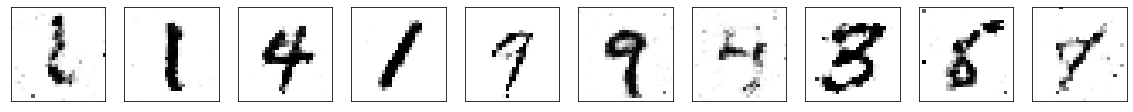

In [13]:
plot_images(generated_images)